<a href="https://colab.research.google.com/github/rabiaozdemir/Transfer_Learning/blob/main/NASNetMobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Input,Concatenate,AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
from keras import backend as K
import pandas as pd
import numpy as np
from keras import layers
from keras.models import load_model, model_from_json
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import os
from pathlib import Path


from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions




from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D

from tensorflow.keras.applications import ResNet50,Xception,NASNetMobile

from keras.utils import np_utils




#from keras.applications.NASNetMobile import preprocess_input
#from keras.applications.NASNetMobile import NASNetMobile

import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization,Activation,Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
train_path="./drive/MyDrive/chest_xray/train"
test_path="./drive/MyDrive/chest_xray/test"

trainDataGen=ImageDataGenerator(rescale=1./255, validation_split=0.1)
testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="training"
    )

valGen=trainDataGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=128,
    subset="validation"
)

testGen=testDataGen.flow_from_directory(
    test_path,
    target_size=(224,224),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=1
    )

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [7]:
base_model=NASNetMobile(include_top=False,weights='imagenet')
base_model.trainable=False

x=Flatten()(base_model.output)
x = GlobalAveragePooling2D()(base_model.output)
x=Dense(32,activation="relu")(x)
x=Dense(32,activation="relu")(x)
x=Dense(32,activation="relu")(x)
out=Dense(3,activation="softmax")(x)
model=Model(inputs=base_model.inputs,outputs=out,name='nasnetmobile')
print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False
model.summary()

774
input_2   False
stem_conv1   False
stem_bn1   False
activation_188   False
reduction_conv_1_stem_1   False
reduction_bn_1_stem_1   False
activation_189   False
activation_191   False
separable_conv_1_pad_reduction_left1_stem_1   False
separable_conv_1_pad_reduction_right1_stem_1   False
separable_conv_1_reduction_left1_stem_1   False
separable_conv_1_reduction_right1_stem_1   False
separable_conv_1_bn_reduction_left1_stem_1   False
separable_conv_1_bn_reduction_right1_stem_1   False
activation_190   False
activation_192   False
separable_conv_2_reduction_left1_stem_1   False
separable_conv_2_reduction_right1_stem_1   False
activation_193   False
separable_conv_2_bn_reduction_left1_stem_1   False
separable_conv_2_bn_reduction_right1_stem_1   False
separable_conv_1_pad_reduction_right2_stem_1   False
activation_195   False
reduction_add_1_stem_1   False
separable_conv_1_reduction_right2_stem_1   False
separable_conv_1_pad_reduction_right3_stem_1   False
activation_197   False
separab

In [4]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=model.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//128,
    validation_data=valGen,
    epochs=5,
    validation_steps=valGen.samples//128
    
)

Epoch 1/5
36/36 [==============================] - ETA: 0s - batch: 17.5000 - size: 127.3056 - loss: 0.8622 - accuracy: 0.6038  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


36/36 [==============================] - 3597s 100s/step - batch: 17.5000 - size: 127.3056 - loss: 0.8622 - accuracy: 0.6038 - val_loss: 0.8828 - val_accuracy: 0.5918
Epoch 2/5
36/36 [==============================] - 481s 13s/step - batch: 17.5000 - size: 127.3056 - loss: 0.6106 - accuracy: 0.7345 - val_loss: 1.3350 - val_accuracy: 0.5039
Epoch 3/5
36/36 [==============================] - 478s 13s/step - batch: 17.5000 - size: 127.3056 - loss: 0.5687 - accuracy: 0.7571 - val_loss: 1.4984 - val_accuracy: 0.3008
Epoch 4/5
36/36 [==============================] - 493s 14s/step - batch: 17.5000 - size: 128.0000 - loss: 0.5471 - accuracy: 0.7652 - val_loss: 1.5755 - val_accuracy: 0.3105
Epoch 5/5
36/36 [==============================] - 490s 14s/step - batch: 17.5000 - size: 126.6111 - loss: 0.5214 - accuracy: 0.7712 - val_loss: 1.5493 - val_accuracy: 0.3203


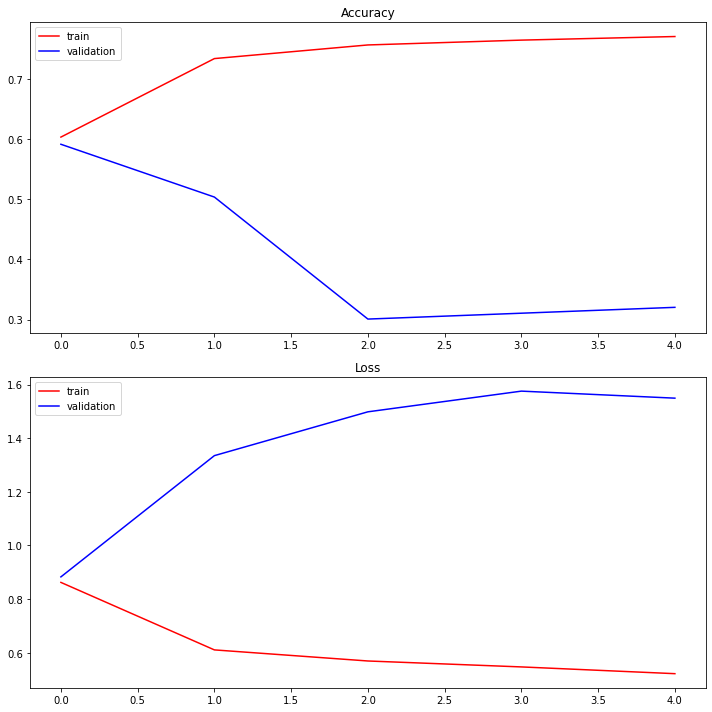

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
#CONFUSİON MATRİX ÇİZDİRME
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(testGen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testGen.classes, y_pred)
print(cm)

print('Classification Report')
print(classification_report(testGen.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1307: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Confusion Matrix
[[ 19   0 218]
 [ 24   1 209]
 [ 12   0 141]]
Classification Report
              precision    recall  f1-score   support

           0       0.35      0.08      0.13       237
           1       1.00      0.00      0.01       234
           2       0.25      0.92      0.39       153

    accuracy                           0.26       624
   macro avg       0.53      0.34      0.18       624
weighted avg       0.57      0.26      0.15       624

